In [1]:
#importing the required libraries which will be used in this classification problem
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/mini project/cats_and_dogs/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/mini project/cats_and_dogs/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [7]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 3171s 5s/step - loss: 1.5536 - accuracy: 0.5778 - val_loss: 0.6868 - val_accuracy: 0.6252
Epoch 2/10
625/625 [==============================] - 27224s 44s/step - loss: 0.5665 - accuracy: 0.7067 - val_loss: 0.6476 - val_accuracy: 0.6874
Epoch 3/10
625/625 [==============================] - 3275s 5s/step - loss: 0.4809 - accuracy: 0.7695 - val_loss: 0.5853 - val_accuracy: 0.7024
Epoch 4/10
625/625 [==============================] - 3102s 5s/step - loss: 0.4172 - accuracy: 0.8132 - val_loss: 0.4466 - val_accuracy: 0.7826
Epoch 5/10
625/625 [==============================] - 3549s 6s/step - loss: 0.3524 - accuracy: 0.8449 - val_loss: 0.7466 - val_accuracy: 0.7018
Epoch 6/10
625/625 [==============================] - 3607s 6s/step - loss: 0.2898 - accuracy: 0.8745 - val_loss: 0.4782 - val_accuracy: 0.8054
Epoch 7/10
625/625 [==============================] - 3292s 5s/step - loss: 0.2310 - accuracy: 0.9071 - val_loss: 0.6001 - val_accurac

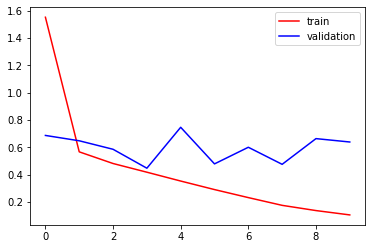

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()